In [1]:
%run 'ks29_Get_folder_structure.ipynb'

In [3]:
%run 'ks35_Read_weights.ipynb'


Variables: 

- weights: pandas.DataFrame containing weights of mutations from neural network data (column 'weight') and weights, or fitness potential, of single mutants (column 'mutant_weight')



In [6]:
%run 'ks20_Read_ddG.ipynb'


Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc

- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)


Variables: 
- predicted_ddG:		Pandas DataFrame with all calculated ddG (single, double and triple mutants (?)),
- predicted_doubles:		doubles only (Pandas DataFrame),
- predicted_singles:		singles only (Pandas DataFrame),
- get_ddG:			function that returns predicted ddG for a genotype
- by_position_mean_ddG:		mean ddG value at each position,
- by_position_var_ddG:		variance of predicted ddG at each position.



In [5]:
%run 'ks21_Read_impacts_of_mutations.ipynb'

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



Variables: 

- fit_dict: a dictionary, keys are mutations and values are pandas.Series of fitness impacts in all backgrounds. 



In [11]:
fitness_summaries = {}
fitness_summaries['mean'] = get_fitness_summary(fit_dict, np.mean)
fitness_summaries['median'] = get_fitness_summary(fit_dict, np.median)
fitness_summaries['std'] = get_fitness_summary(fit_dict, np.std)

for k in fitness_summaries:
    predicted_singles['fitness_impact_%s' %k] = predicted_singles['mut_list_Scer'].apply(lambda m: fitness_summaries[k][m])

In [12]:
predicted_singles[:3]

,ddG,ddg_score1,ddg_score2,ddg_score3,mut_list_Scer,mut_number,segment,mut_list_Scer_full,position,fitness_impact_std,fitness_impact_median,fitness_impact_mean
0,3.133333,-559.263,-559.211,-559.263,102L,1,S6,Q102L,102,0.139014,-0.007470,-0.026179
11,5.615667,-556.760,-556.767,-556.763,102K,1,S6,Q102K,102,0.152689,-0.022616,-0.053658
22,0.534000,-561.829,-561.850,-561.856,102M,1,S6,Q102M,102,0.131562,-0.008667,-0.023873


In [42]:
%run 'ks38_Read_secondary_structure.ipynb'


Variables: 

- helices:			list of position in alpha-helices
- sheets:			list of position in beta-sheets
- disordered:			all positions that are not in alpha-helices or beta-sheets

- get_secondary_structure:	a function that returns secondary structure of a position



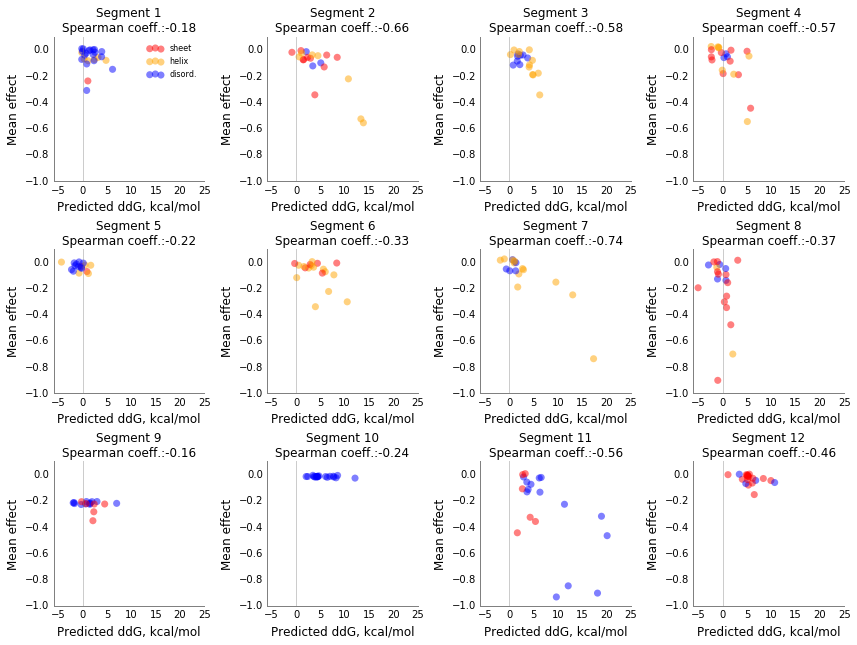

In [53]:
ss_colors = {'helix':'orange', 'sheet':'red', 'disordered':'blue'}

title = 'Epistasis between two mutations vs. ddG of a double mutant\nNegative epistasis in blue, positive -- in red'

x = 'ddG'
y = 'fitness_impact_mean'

plot_better(width=12, height=9)
for segment in ['S%s' %i for i in range(1,13)]:
    ax = plt.subplot(3, 4, int(segment[1:]))
    improve_plot(ax, grid='')
    to_plot = predicted_singles[[x, y, 'segment', 'position']].dropna()[predicted_singles['segment'] == segment]
    for row in to_plot.iterrows():
        secondary_structure = get_secondary_structure(row[1]['position'])
        plt.scatter(row[1][x], row[1][y], edgecolor='none', alpha=0.5, s=50, color=ss_colors[secondary_structure])
    if segment == 'S1':
        for ss in ss_colors:
            color = ss_colors[ss]
            if ss == 'disordered':
                ss = 'disord.'
            plt.scatter(None, None, edgecolor='none', alpha=0.5, s=50, color=color, label=ss)
        plt.legend(loc='upper right', frameon=False, fontsize=8)
    # plt.title(title, fontsize=14)
    plt.title('Segment %s\nSpearman coeff.:%.2f' %(segment[1:], stats.spearmanr(to_plot[x], to_plot[y])[0]))
    plt.xlim(-6, 25)
    plt.ylim(-1, 0.1)
    plt.axvline(0, color='gray', alpha=0.4)
    plt.xlabel('Predicted ddG, kcal/mol', fontsize=12)
    plt.ylabel('Mean effect', fontsize=12)
plt.tight_layout()